In [1]:
import json
import h5py
from load_data import *
from model import *
from scipy import io 
import tensorflow as tf 
import os 

Importamos los ground truth del conjunto de entrenamiento y test. 

In [2]:
json_train = open('JSON FILES\DTS_SG_part_A.json')
json_test = open('JSON FILES\DTS_SG_part_A_TEST.json')
paths_train = json.load(json_train)
paths_test = json.load(json_test)

#Cargamos la data 
train_GT = mLoad_GT(paths_train, n=10)
train_img = mLoad_Img(paths_train, n=10)

test_GT = mLoad_GT(paths_test, n=5)
test_img = mLoad_Img(paths_test, n=5)

Construimos la red neuronal. Este sera un prototipo hasta siguiente cambio

In [8]:
input_shape = train_img[0,:,:,:].shape
model = Betsy(input_shape)

model.compile(loss = tf.keras.losses.MeanSquaredError(), 
              optimizer  = tf.keras.optimizers.Adam(learning_rate = 0.01), 
              metrics=['mean_squared_error'])

In [4]:
model.build_graph(input_shape).summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 768, 1024, 1)]    0         
                                                                 
 ftgd_conv_layer (FTGDConvLa  (None, 768, 1024, 16)    240       
 yer)                                                            
                                                                 
 activation (Activation)     (None, 768, 1024, 16)     0         
                                                                 
 ftgd_conv_layer_1 (FTGDConv  (None, 768, 1024, 32)    3312      
 Layer)                                                          
                                                                 
 activation_1 (Activation)   (None, 768, 1024, 32)     0         
                                                                 
 conv2d (Conv2D)             (None, 768, 1024, 1)      33    

Entrenamos un poco para testeo!

In [5]:
import os

In [6]:
checkpoint_path = "training/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


history = model.fit(train_img, 
                    train_GT, 
                    batch_size = 10, 
                    epochs = 1, 
                    validation_data=(test_img, test_img), 
                    callbacks=[cp_callback])

1/1 [==============================] - ETA: 0s - loss: nan - accuracy: 0.9974
Epoch 1: saving model to training\cp.ckpt
1/1 [==============================] - 164s 164s/step - loss: nan - accuracy: 0.9974 - val_loss: nan - val_accuracy: 0.3049


In [56]:
model.layers[1].deploy()
model.layers[3].deploy()

In [57]:
score = model.evaluate(test_img, test_GT, verbose = 0)
print('Test Mean Squared Error : %.2f and Test Loss : %.3f' % (score[1]*100, score[0]))

Test Mean Squared Error : 0.04 and Test Loss : 0.000


In [58]:
tt = model(test_img)

In [59]:
tt.shape

TensorShape([5, 768, 1024, 1])

In [28]:
tt[0,:,:,1].nu

(768, 1024)

In [ ]:
from skimage import io

io.imshow(tt[2,:,:,0].numpy())

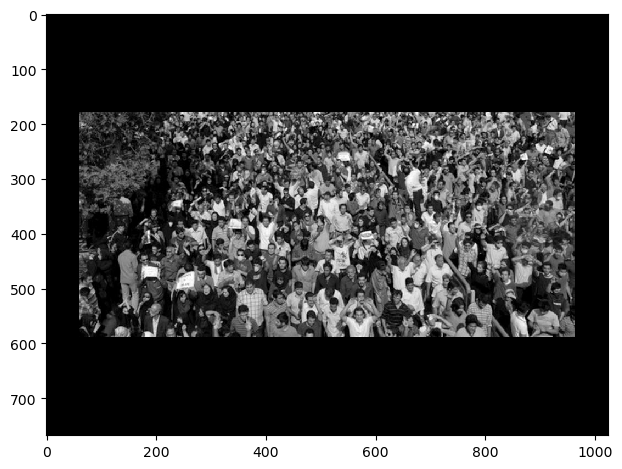

In [69]:
io.imshow(test_img[2,:,:,0].numpy())

In [72]:
io.imsave('1.jpg', test_GT[2,:,:,0].numpy())

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14680\3959260887.py:1: UserWarning: 1.jpg is a low contrast image
  io.imsave('1.jpg', test_GT[2,:,:,0].numpy())
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


c:\Users\Usuario\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


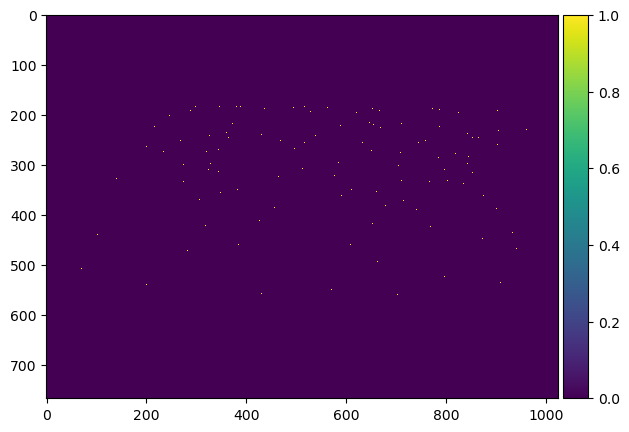

In [70]:
io.imshow(test_GT[2,:,:,0].numpy())

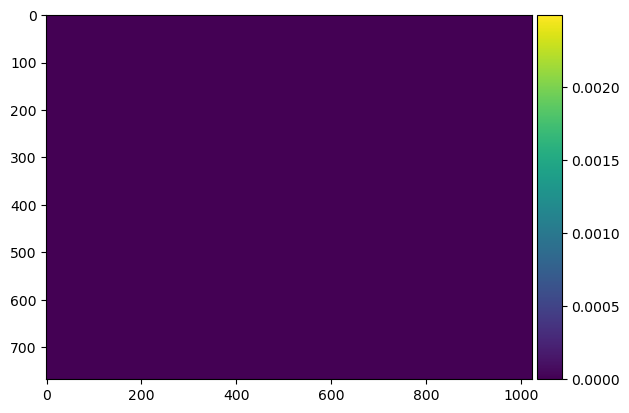

In [67]:
from skimage import io

io.imshow(tt[2,:,:,0].numpy())